In [1]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
# configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [4]:
# prepare our input data. We're using MNIST digits, and we're discarding the labels
(x_train, _), (x_test, _) = mnist.load_data()
# normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print("x_train.shape - > ", x_train.shape)
print("x_test.shape -> ", x_test.shape)

11460608/11490434 [============================>.] - ETA: 0sx_train.shape - >  (60000, 784)
x_test.shape ->  (10000, 784)


In [5]:
# train our autoencoder for 50 epochs
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s - loss: 0.3701 - val_loss: 0.2733
Epoch 2/50
60000/60000 [==============================] - 2s - loss: 0.2670 - val_loss: 0.2577
Epoch 3/50
60000/60000 [==============================] - 3s - loss: 0.2470 - val_loss: 0.2337
Epoch 4/50
60000/60000 [==============================] - 3s - loss: 0.2250 - val_loss: 0.2146
Epoch 5/50
60000/60000 [==============================] - 3s - loss: 0.2091 - val_loss: 0.2013
Epoch 6/50
60000/60000 [==============================] - 3s - loss: 0.1978 - val_loss: 0.1915
Epoch 7/50
60000/60000 [==============================] - 3s - loss: 0.1890 - val_loss: 0.1836
Epoch 8/50
60000/60000 [==============================] - 3s - loss: 0.1818 - val_loss: 0.1772
Epoch 9/50
60000/60000 [==============================] - 3s - loss: 0.1758 - val_loss: 0.1717
Epoch 10/50
60000/60000 [==============================] - 2s - loss: 0.1707 - val_loss: 0.1668

In [7]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

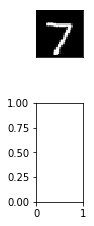

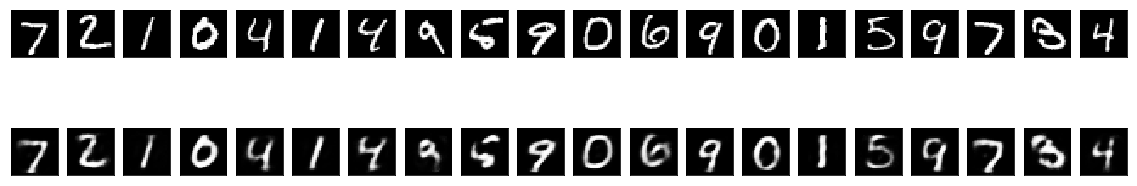

In [8]:
# visualize the reconstructed inputs and the encoded representations.use Matplotlib
n = 20  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()